In [1]:

import sys, os
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB : 
    # va s exécuter sur google colab
    from google.colab import drive
    drive.mount('/content/gdrive')
    root_dir = "/content/gdrive/My Drive/cours_deep/cours_epsi/git/mlcourse.ai"
    get_file = lambda fn : os.path.join(root_dir, "data", fn)
else :
    # avec jupyter, le cad est le folder ou se trouve le notebook
    get_file = lambda fn : os.path.join("..", "..", "data", fn)
%pwd



'/home/louis/dev/git/mlcourse.ai/jupyter_english/tp'

In [22]:
import numpy as np
import pandas as pd
import os
import io
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from time import time

from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    #tree_str = export_graphviz(
    #    tree, feature_names=feature_names, filled=True, out_file=None
    #)
    plot_tree(tree)
    #graph = pydotplus.graph_from_dot_data(tree_str)
    #graph.write_png(png_file_to_save)
    

pd.set_option("display.precision", 2)
file = os.path.join("traffic_accidents.csv")
file = "/home/louis/Desktop/traffic_accidents.csv"
file = "/home/louis/Desktop/heart_disease.csv"
file = "/home/louis/dev/git/mlcourse.ai/data/telecom_churn.csv"

file  = get_file("telecom_churn.csv")
df = pd.read_csv(file).dropna(axis=1)

try :
    df = df.drop("crash_date", axis=1)
except :
    pass

try :
    df = df.drop(["State"], axis=1)
    df["International plan"] = df["International plan"].map({"Yes": 1, "No": 0})
    df["Voice mail plan"] = df["Voice mail plan"].map({"Yes": 1, "No": 0})    
except :
    pass

df1 = df.copy()
#df1.drop("Churn", axis=1)
EKOX(df1.head())

def get_info(df) :
    buf = io.StringIO()
    df.info(buf=buf)
    s = buf.getvalue()
    return s

for ct, c in zip(df.dtypes, df.columns) :
    if ct.name == "object" :
        one_hot = pd.get_dummies(df[c], prefix=c)
        df1 = df1.drop(c, axis = 1)
        df1 = df1.join(one_hot)
df1.head()

/tmp/ipykernel_53674/948212124.py:53: [36206ms] df1.head()=   Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99         

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [23]:
dfx = df.drop("Churn", axis=1)
y = df["Churn"]

In [24]:
y

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool

/tmp/ipykernel_53674/1325137836.py:1: [119645ms] df1.shape=(3333, 19).
/tmp/ipykernel_53674/1325137836.py:10: [0091ms] clf_tree=DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=17).


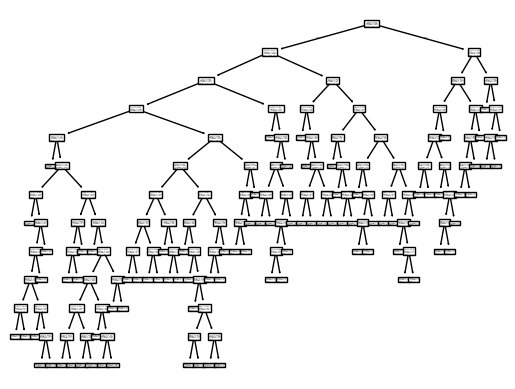

In [28]:


EKOX(df1.shape)    
scaler = StandardScaler()
X = dfx._get_numeric_data()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=12, random_state=17)
clf_tree.fit(X_train, y_train)
EKOX(clf_tree)

tree_graph_to_png(
    tree=clf_tree,
    feature_names=["x1", "x2"],
    png_file_to_save="./tree.png")
plt.plot()
plt.show()
    


In [29]:
y_pred = clf_tree.predict(X_test)
precision_score(y_test, y_pred,)

0.7531645569620253